                          TASK 3 - STOCK MARKET PREDICTION USING NUMERICAL ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns

In [2]:
import matplotlib as mpl
from matplotlib import style

#Adjusting the size of matplotlib
mpl.rc('figure', figsize = (15 , 15))
mpl.__version__

#Adjusting the style of matplotlib
style.use('ggplot')

In [3]:
!pip install pandas-datareader

In [4]:
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [5]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 11)

In [6]:
df = web.DataReader("AAPL", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526072,352410800.0,6.492372
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.593426
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.604825
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.499768
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.487752


In [7]:
close_px = df['Adj Close']
mavg = close_px.rolling(window = 100).mean()
mavg.head(10)

Date
2009-12-31   NaN
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
Name: Adj Close, dtype: float64

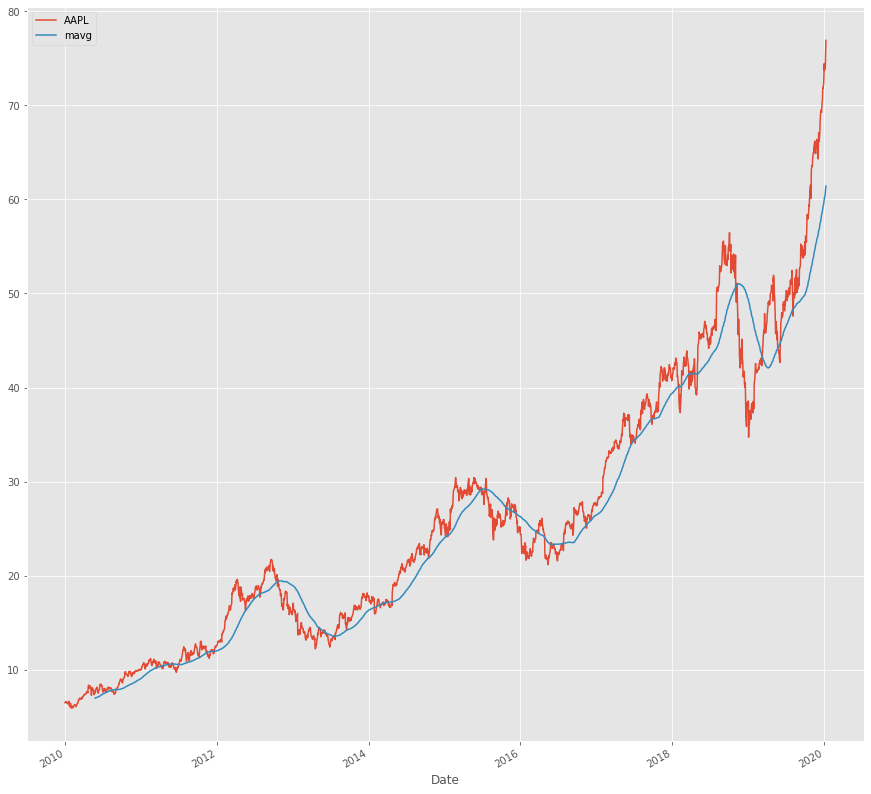

In [8]:
close_px.plot(label = 'AAPL')
mavg.plot(label = 'mavg')
plt.legend()
plt.show()

In this chart, the Moving Average showcases increasing trend the upturn or downturn of stocks price. Logically, you should buy when the stocks are experiencing downturn and sell when the stock and experiencing upturn.

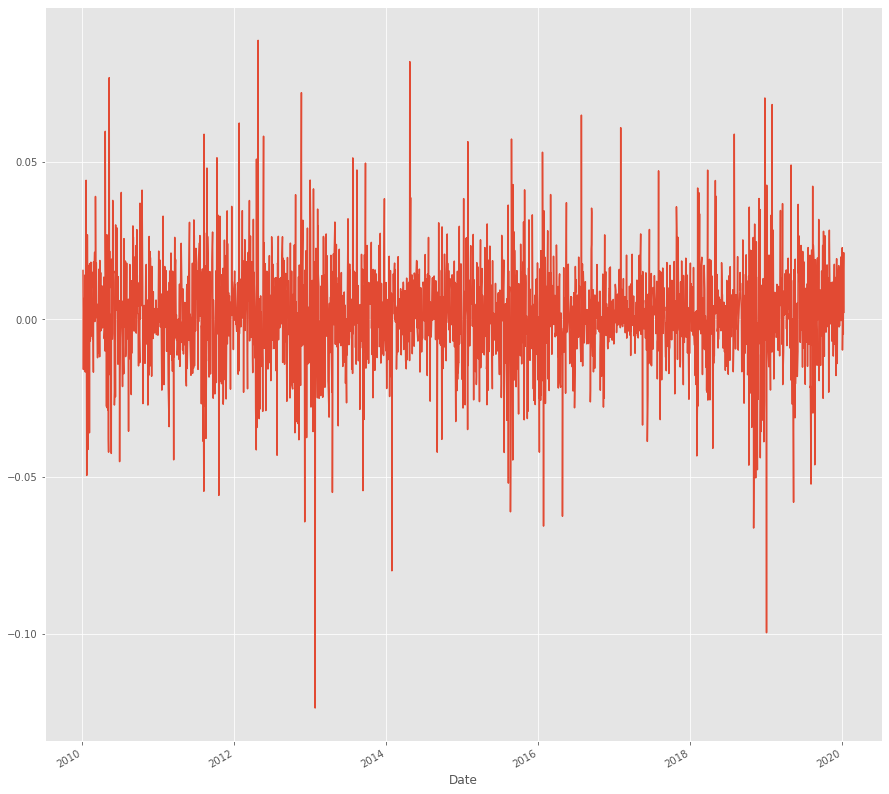

In [9]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label = 'return')
plt.show()

logically, our ideal stocks should return as high and stable as possible. if you are risk averse, you might want to avoid this stocks as you saw the 10% drop in 2013. This decision is heavily subjected to your general sentiment of stocks and competitor analysis.

In [10]:
df.comp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo', start = start, end = end)['Adj Close']
df.comp.head(10)

<ipython-input-10-9f5c30a4b9e2>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.comp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo', start = start, end = end)['Adj Close']


Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,6.492372,10.605983,308.832428,91.085335,23.739305
2010-01-04,6.593426,10.830304,312.204773,92.163887,24.105360
2010-01-05,6.604825,10.886385,310.829926,91.050545,24.113148
2010-01-06,6.499768,10.830304,302.994293,90.459076,23.965164
2010-01-07,6.487752,11.391096,295.940735,90.145927,23.715933
2010-01-08,6.530883,11.636443,299.885956,91.050545,23.879499
2010-01-11,6.473271,11.748603,299.432648,90.097221,23.575750
2010-01-12,6.399639,11.755613,294.137512,90.813965,23.419973
2010-01-13,6.489907,11.797671,292.448822,90.619125,23.638054


In [11]:
retscomp = df.comp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.021150,0.010920,0.011841,0.015420
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005151,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,0.051780,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.021538,0.013331,0.010035,0.006897
2010-01-11,-0.008822,0.009639,-0.001512,-0.010470,-0.012720
2010-01-12,-0.011375,0.000597,-0.017684,0.007955,-0.006608
2010-01-13,0.014105,0.003578,-0.005741,-0.002145,0.009312


To prove the positive correlations, we will use heat map to visualize the correlation ranges among the competing stocks. Notice that the lighter the color, the more correlated the two stocks are.

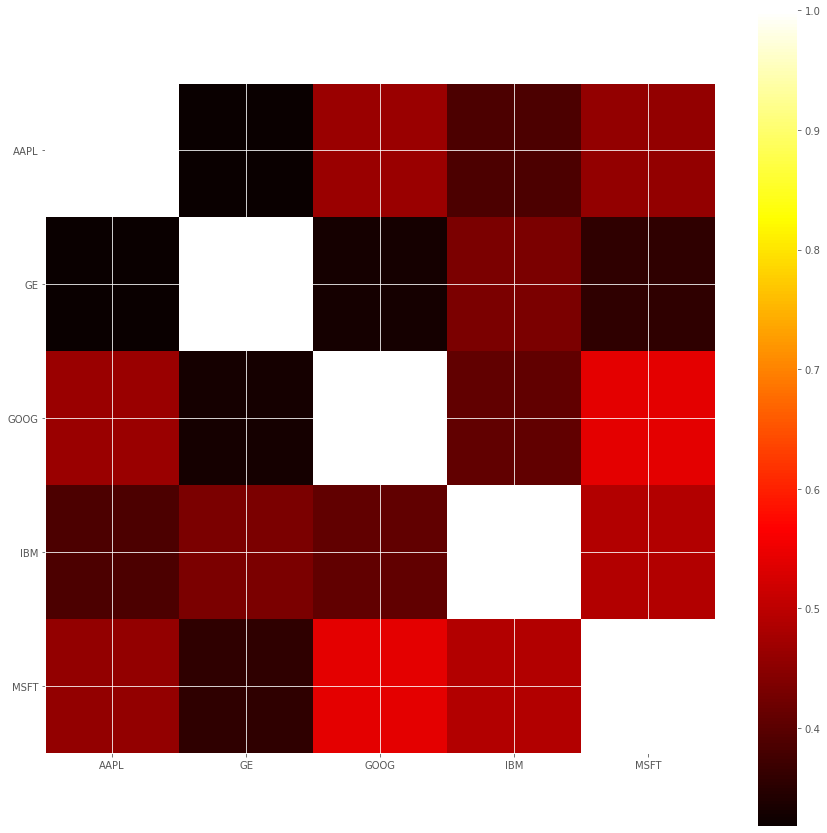

In [12]:
plt.imshow(corr, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

From the scatter matrix and heatmap, we can find great correlations among the competing stocks.However, this might not show causally, and could just show the trend in the technology industry rather than show how competing stocks affect each other.

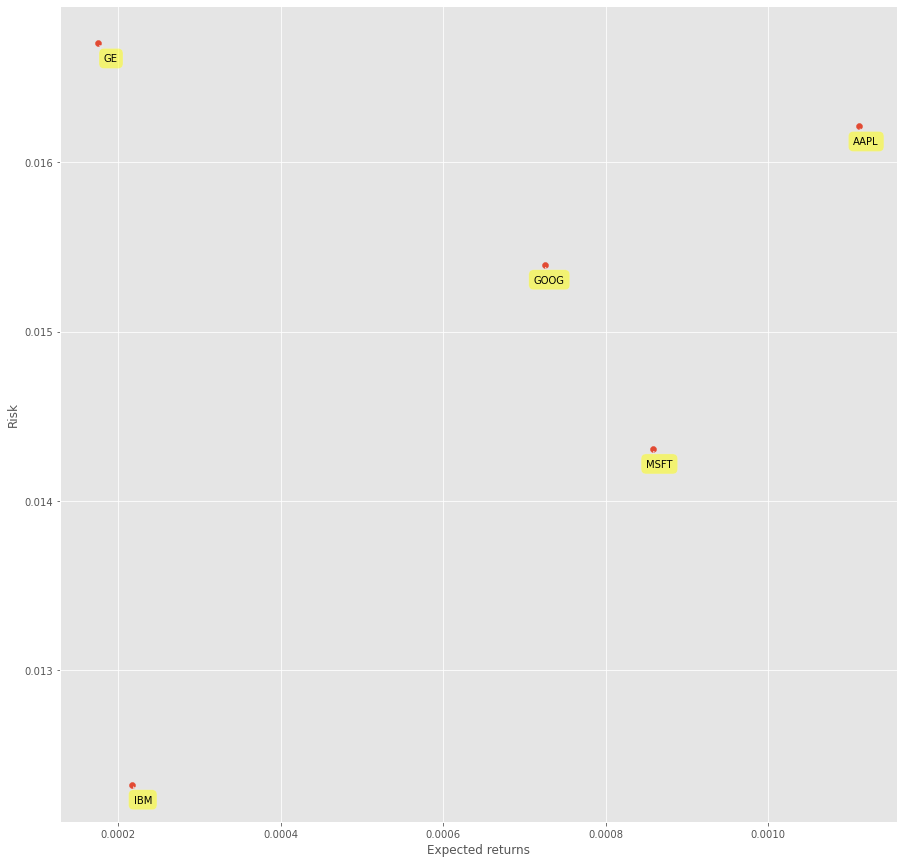

In [13]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(label, xy = (x , y), xytext = (20 , -20), textcoords = 'offset points',
                 ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'yellow',
                 alpha = 0.5), arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0'))